# Brightness, Contrast, Exposure

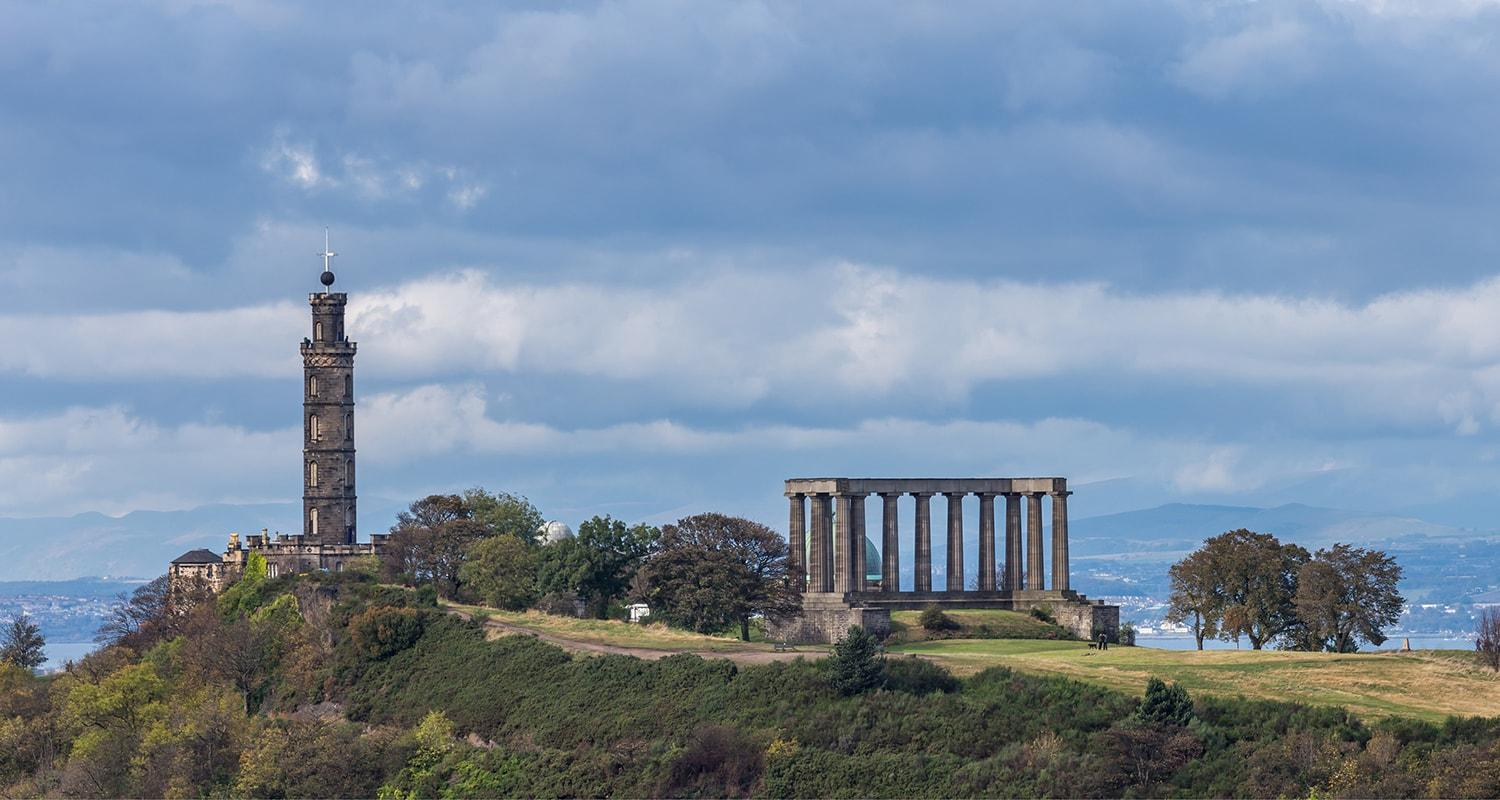

In [3]:
import numpy as np
from PIL import Image as image
from IPython.display import display, Image
from io import BytesIO

img = np.array(image.open('monument.jpg'))
height, width, channels = img.shape
f = BytesIO()
image.fromarray(img.astype('uint8')).save(f, 'jpeg')
display(Image(f.getvalue()))

# Brightness

In [2]:
def truncate(a):
    if a > 255:
        return 255
    elif a < 0:
        return 0
    return a

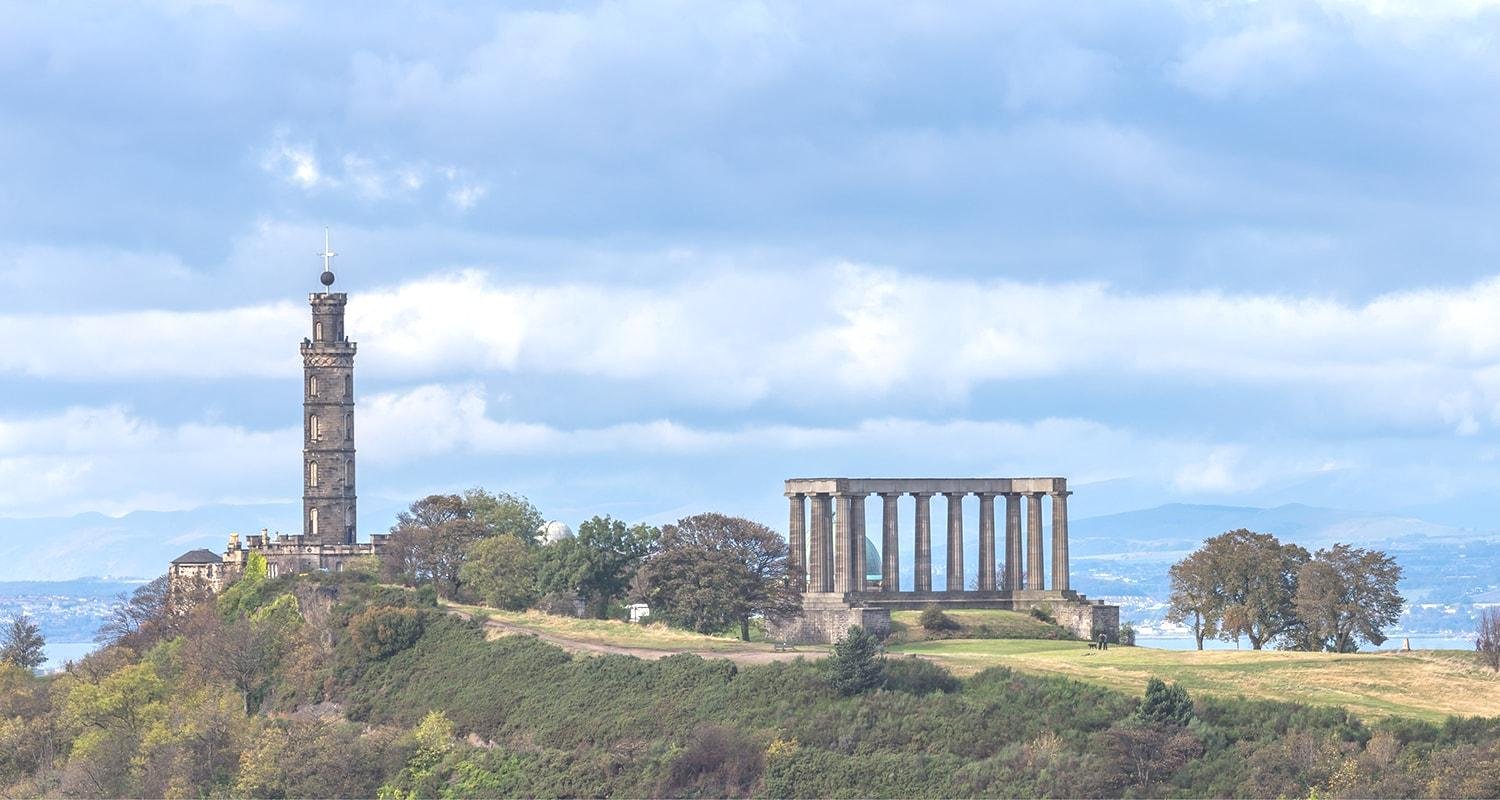

In [5]:
# Brightness - -255 <= b <= 255

bright1 = np.zeros((height, width, channels))
b1 = 50
for i in range(height):
    for j in range(width):
        for k in range(channels):
            
            bright1[i][j][k] = truncate(img[i][j][k] + b1)

f = BytesIO()
image.fromarray(bright1.astype('uint8')).save(f, 'jpeg')
display(Image(f.getvalue()))

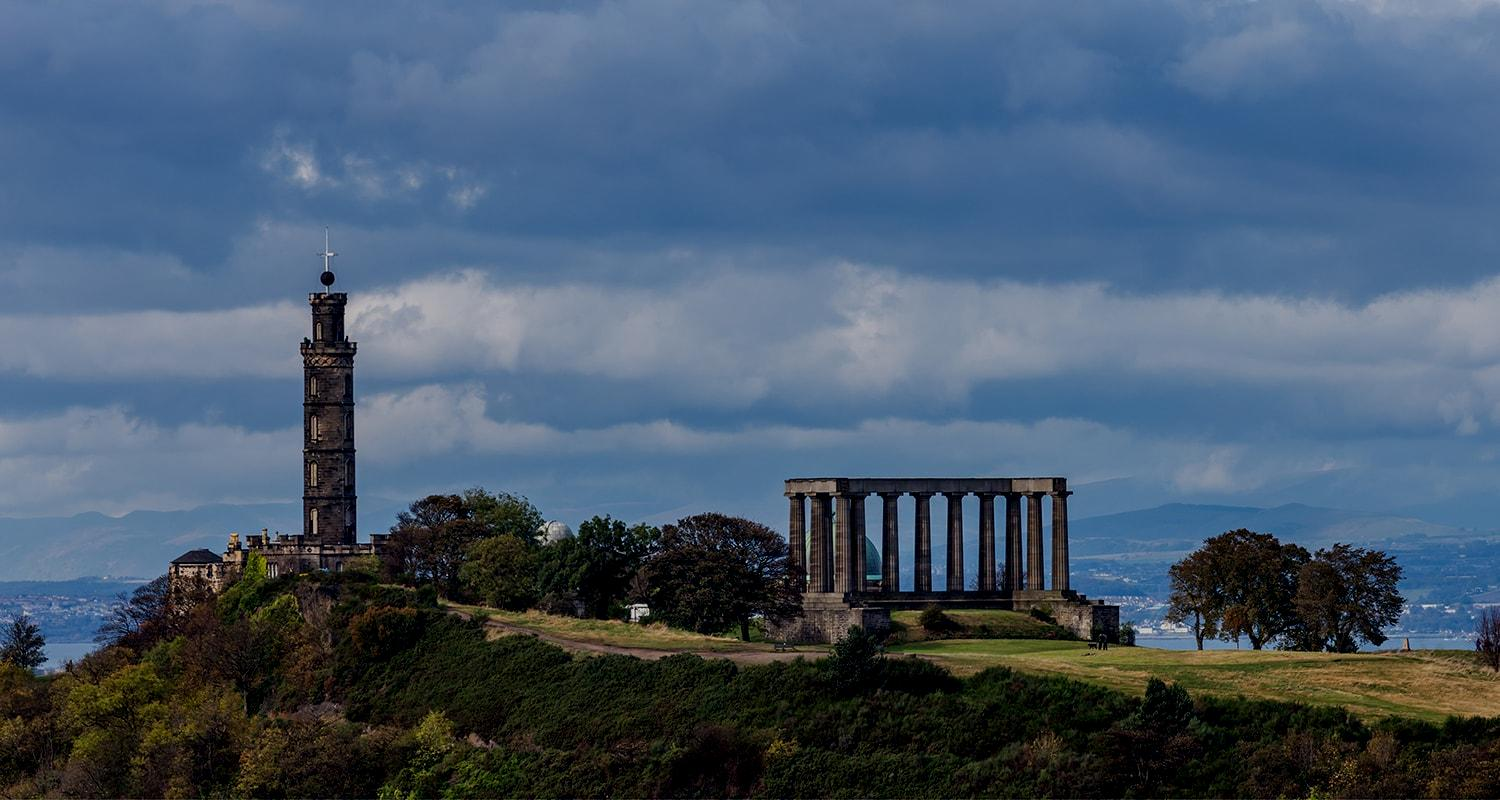

In [6]:
bright2 = np.zeros((height, width, channels))
b2 = -50
for i in range(height):
    for j in range(width):
        for k in range(channels):
            
            bright2[i][j][k] = truncate(img[i][j][k] + b2)

f = BytesIO()
image.fromarray(bright2.astype('uint8')).save(f, 'jpeg')
display(Image(f.getvalue()))

# Contrast

### contrastFactor = 259 * (255+c) / ((259-c)*255)
### newValue = contrastFactor * (oldValue - 128) + 128

In [7]:
def contrast(c):
    return 259*(255+c)/((259-c)*255)     ### Contrast Factor

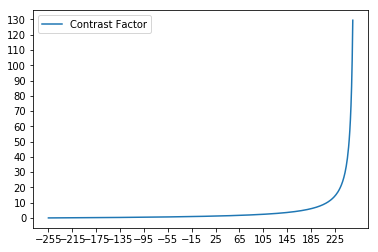

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(-255, 256)
plt.plot(x, contrast(x), label='Contrast Factor')
plt.xticks(range(-255, 255, 40))
plt.yticks(range(0, 140, 10))
plt.legend()
plt.show()

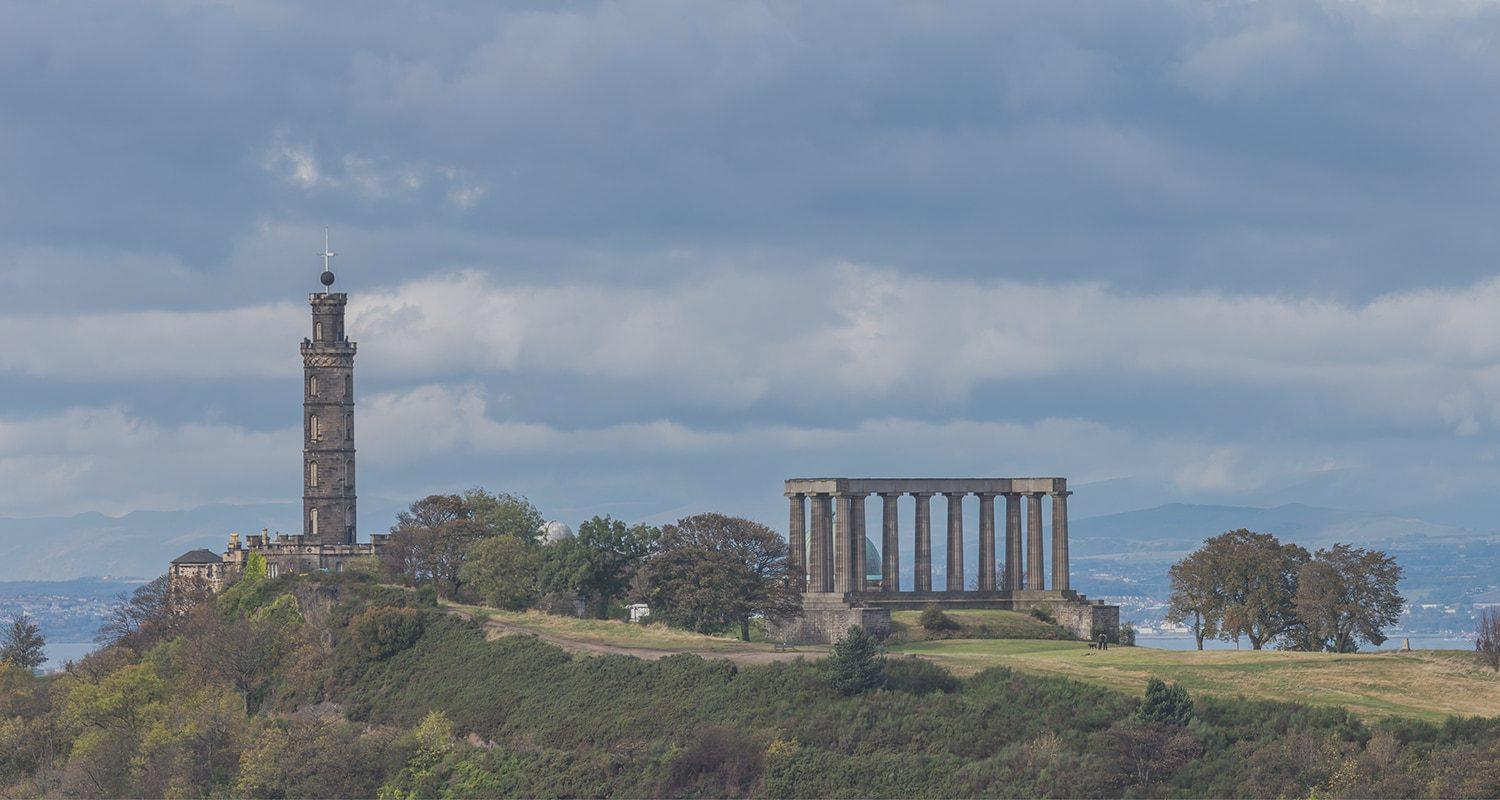

In [25]:
# Contrast - -255 <= c <= 255

cont1 = np.zeros((height, width, channels))
c1 = -50
f = contrast(c1)
for i in range(height):
    for j in range(width):
        for k in range(channels):
            
            cont1[i][j][k] = truncate(f*(img[i][j][k] - 128) + 128)

f = BytesIO()
image.fromarray(cont1.astype('uint8')).save(f, 'jpeg')
display(Image(f.getvalue()))

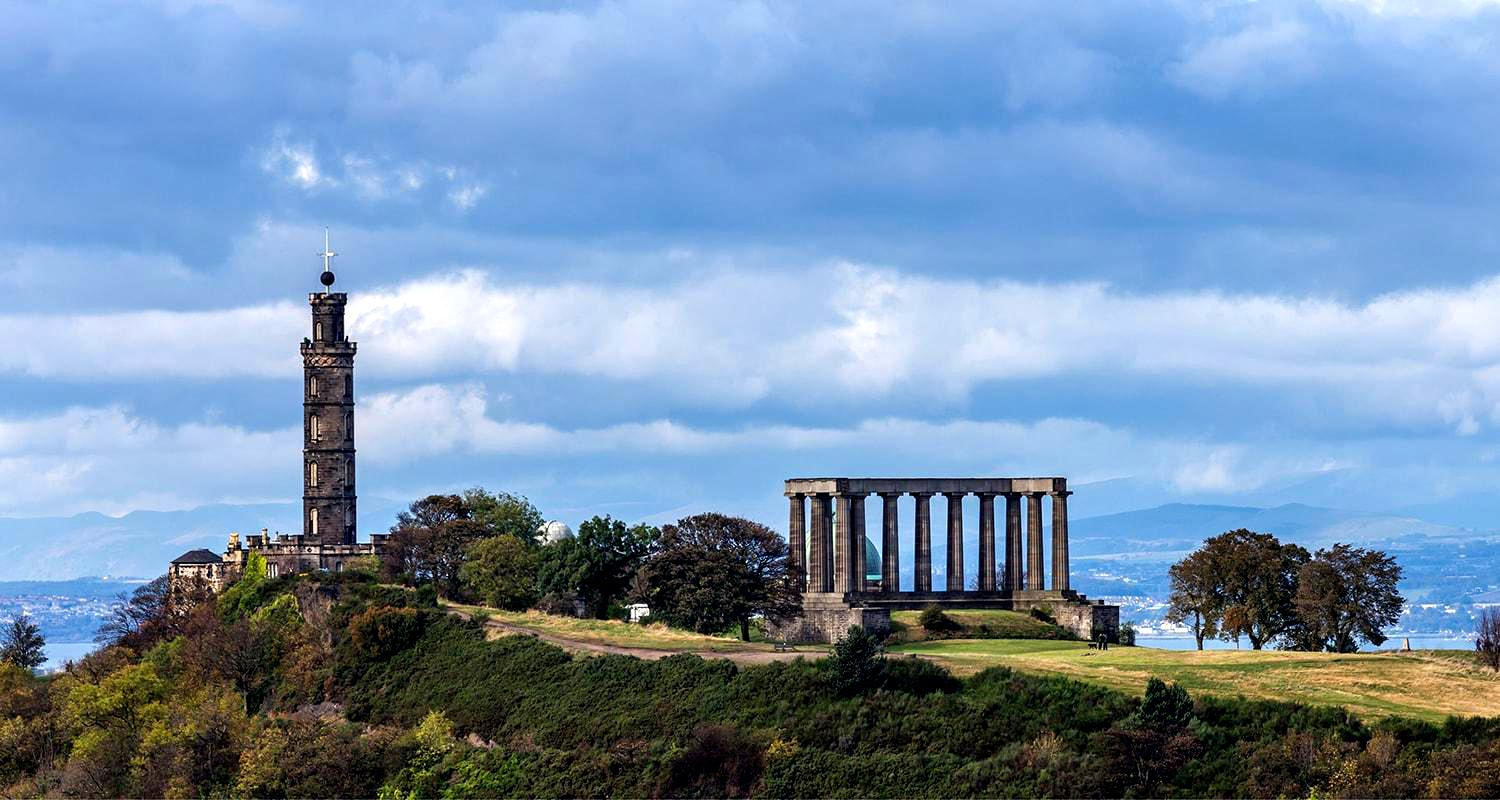

In [24]:
cont2 = np.zeros((height, width, channels))
c2 = 50
f = contrast(c2)
for i in range(height):
    for j in range(width):
        for k in range(channels):
            
            cont2[i][j][k] = truncate(f*(img[i][j][k] - 128) + 128)

f = BytesIO()
image.fromarray(cont2.astype('uint8')).save(f, 'jpeg')
display(Image(f.getvalue()))

# Exposure

### newValue = oldValue * ( 2 ^ exposureCompensation)

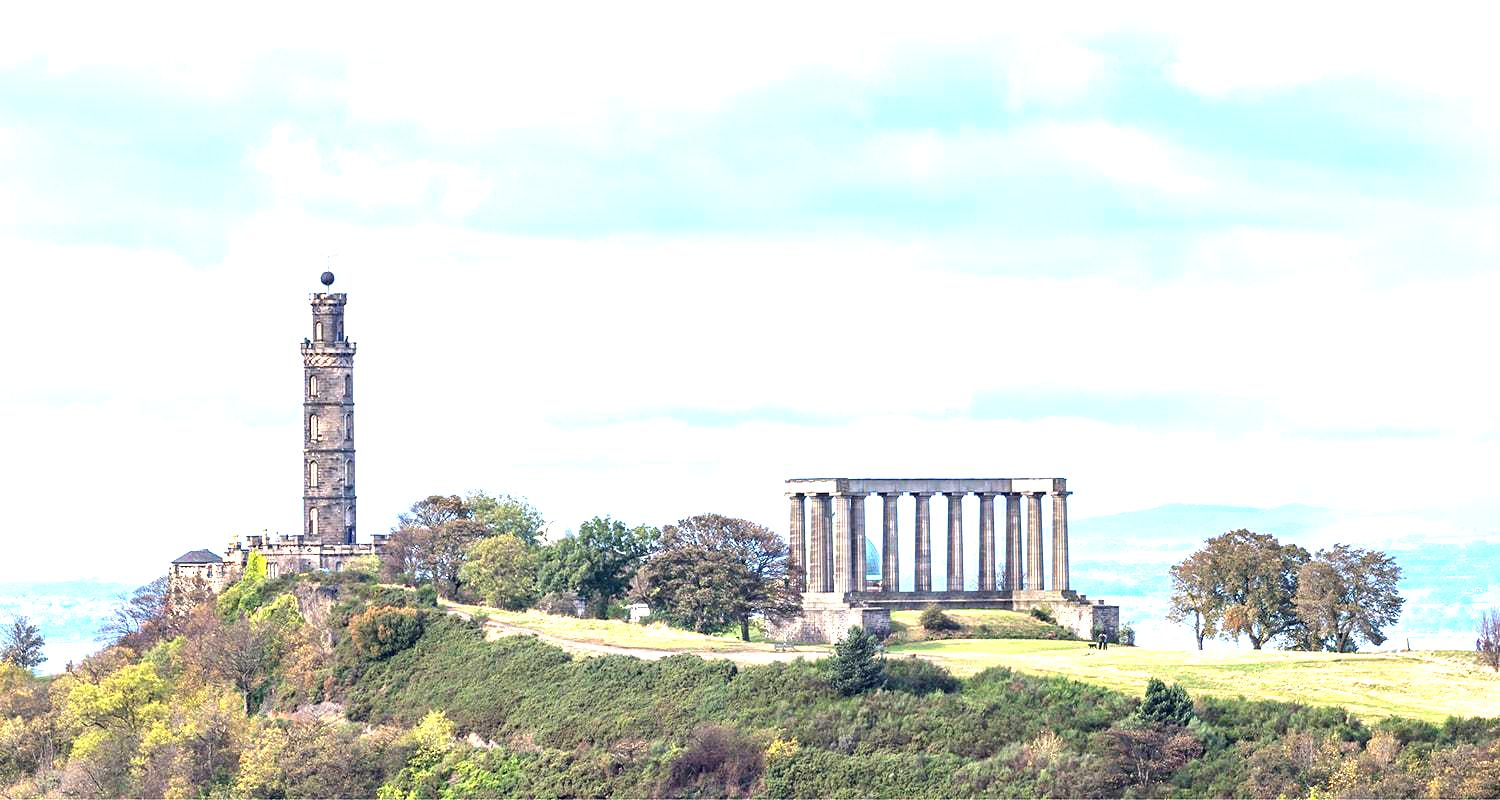

In [26]:
expose1 = np.zeros((height, width, channels))
exposureCompensation = 1
for i in range(height):
    for j in range(width):
        for k in range(channels):
            
            expose1[i][j][k] = truncate(img[i][j][k] * (2**exposureCompensation))

f = BytesIO()
image.fromarray(expose1.astype('uint8')).save(f, 'jpeg')
display(Image(f.getvalue()))

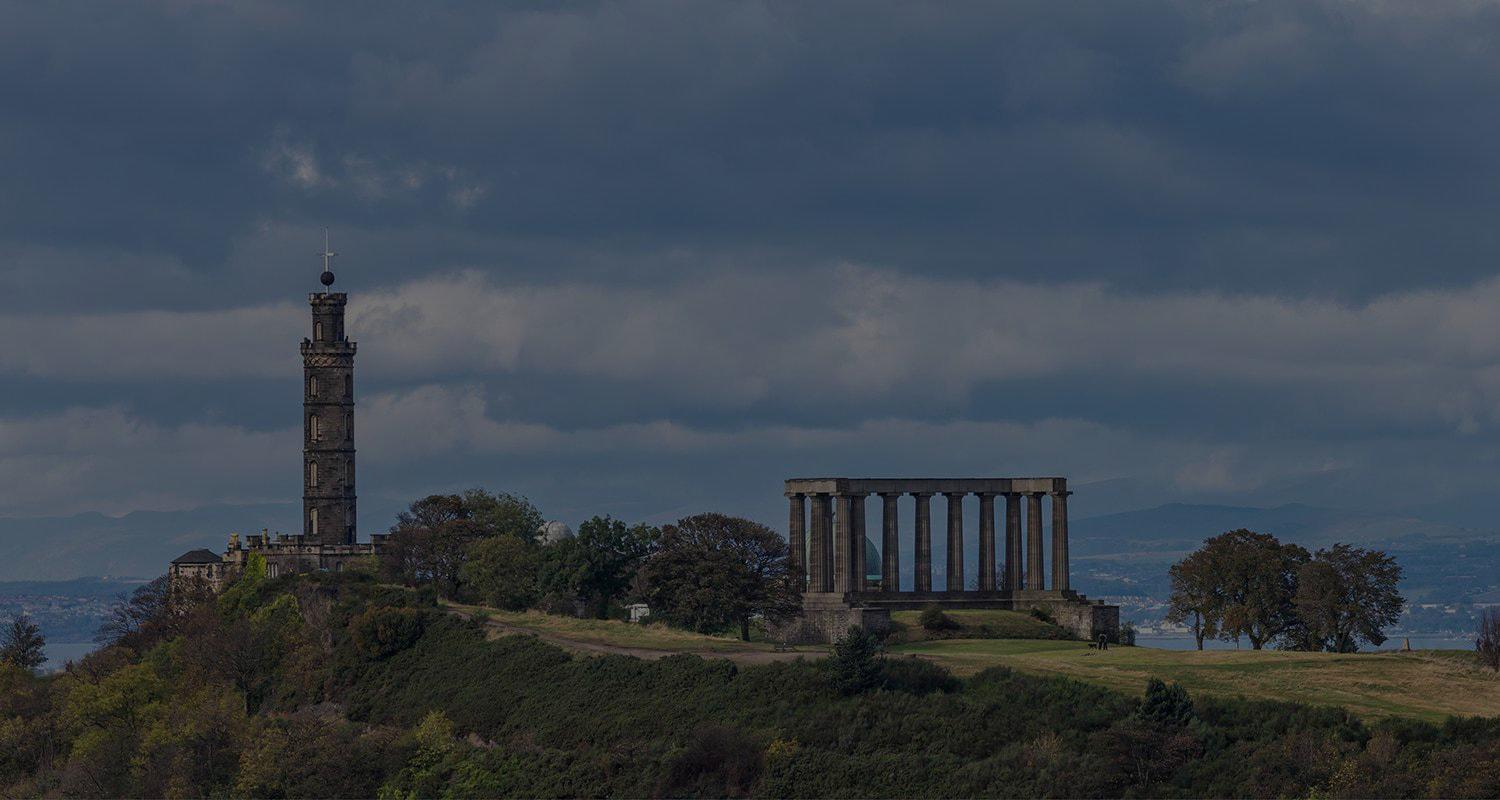

In [27]:
expose2 = np.zeros((height, width, channels))
exposureCompensation = -1
for i in range(height):
    for j in range(width):
        for k in range(channels):
            
            expose2[i][j][k] = truncate(img[i][j][k] * (2**exposureCompensation))

f = BytesIO()
image.fromarray(expose2.astype('uint8')).save(f, 'jpeg')
display(Image(f.getvalue()))